In [36]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import database_credentials as dc

In [37]:
# Database credentials
postgres_user = dc.user()
postgres_pw = dc.pw()
postgres_host = dc.host()
postgres_port = dc.port()
postgres_db = dc.db()

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

In [38]:
# creating a table for assigned loads
sql = '''
SELECT carrier_id, guid, id, date(assigned_date)
FROM ctms_db_public.msd_order
WHERE date(assigned_date) >= date(current_date - interval '28 days')
AND date(assigned_date) < date(current_date)
'''
assigned_loads = pd.read_sql_query(sql, con=engine)
assigned_loads = assigned_loads.rename(columns={'id': 'order_id', 'guid': 'order_guid', 'date': 'assigned_date'})
assigned_loads

,carrier_id,order_guid,order_id,assigned_date
0,43021,dbac3a75-cd99-450c-b657-4d7438152b59,7730955,2020-12-08
1,5225,3709e3b8-258d-48dc-aee8-9a7ac85c86ff,7731025,2020-12-08
2,5674,aa79fa73-f866-4c45-9b02-1e6b59e634dd,7731078,2020-12-08
3,34669,03dc742b-2f3e-4698-96e6-c642b91187f9,7731142,2020-12-08
4,7579,2baa14cc-83d8-474d-a295-9b3bb03367f5,7557205,2020-12-08
...,...,...,...,...
166116,11209,ce2ddd4d-2ebc-4cfb-8a21-9a93e3611bea,7910795,2021-01-04
166117,43785,204792a9-989c-454d-bcb4-0a4e8bf1fbaf,7911555,2021-01-04
166118,17921,60797e9f-0646-4863-b55f-651f50d75824,7911826,2021-01-04
166119,9831,9ebd486c-f2ff-46e4-a7e8-7b4f786ffc0c,7912045,2021-01-04


In [39]:
assigned_loads.isna().sum()/assigned_loads.isna().count()

carrier_id       0.0
order_guid       0.0
order_id         0.0
assigned_date    0.0
dtype: float64

In [40]:
assigned_loads.describe(include='all')

,carrier_id,order_guid,order_id,assigned_date
count,166121.000000,166121,1.661210e+05,166121
unique,NaN,166121,NaN,28
top,NaN,6c727b79-35ea-40e2-8186-b901f8585d94,NaN,2021-01-04
freq,NaN,1,NaN,10238
mean,23677.745547,NaN,7.803732e+06,NaN
std,13226.771270,NaN,2.400290e+05,NaN
min,23.000000,NaN,4.091300e+04,NaN
25%,12144.000000,NaN,7.771092e+06,NaN
50%,25572.000000,NaN,7.817355e+06,NaN
75%,35366.000000,NaN,7.864234e+06,NaN


In [41]:
# creating a table for carriers
sql = '''
SELECT name, guid, id
FROM ctms_db_public.msd_carrier
'''
carriers = pd.read_sql_query(sql, con=engine)
carriers = carriers.rename(columns={'id': 'carrier_id', 'guid': 'carrier_guid', 'name': 'carrier_name'})
carriers

,carrier_name,carrier_guid,carrier_id
0,ayman,71918a40-f1df-4b52-b925-129ed39183f1,7
1,CN2,c623837b-04ee-4cf7-a44c-bca993c4d057,16
2,Transcontinental Express LLC,e835ef60-4200-4863-916a-0eed5bd18f93,25
3,Sifuentes Auto Transport,0a142cbc-cc41-42be-96cc-9bee4dde0929,29
4,A1 USA Express,e97661bf-33fa-4b77-b4b4-23c960e54da8,37
...,...,...,...
40575,ROADTRIPZ VEHICLE LOGISTICS LTD,65729836-c560-4614-80a2-9db49a858ea4,33165
40576,ASCENDANT AUTO TRANSPORT LLC,0bff957d-4437-45e0-b728-a0a80d97f40d,41027
40577,SMOKEYS TRANSPORTATION SERVICES LLC,fe1b4f5c-8773-4ba5-a5d1-286cd37f80b1,37160
40578,EL JALISCIENSE AUTO SALES INC,c4600308-fea8-42e3-b6e1-d5058c5e4919,43785


In [42]:
# Creating a table with all drivers
sql = '''
SELECT genericuser_ptr_id, carrier_id, guid
FROM ctms_db_public.msd_driver
WHERE is_suspended = False
'''
drivers = pd.read_sql_query(sql, con=engine)
drivers = drivers.rename(columns={'guid': 'driver_guid'})
drivers

,genericuser_ptr_id,carrier_id,driver_guid
0,38,20,c03bbd2c-bcf4-43bc-ac35-1a622cdf34f4
1,84,28,5e0349d6-6720-467b-b72d-f248e1be6c4d
2,101,42,bb8229f1-0cb5-46ac-8db8-05ebdb1561f0
3,117,5478,81fe5f04-ff57-4f09-b99b-86b4fab06347
4,136,5478,f65c4afc-6d34-4d74-9a0f-e7323ab305df
...,...,...,...
62269,83750,43594,b15dddd1-5451-49cf-97a5-607416284bc3
62270,83959,43731,904a491e-6384-4fcb-951c-141429f54d58
62271,84149,36702,ef4cae98-11db-46f5-89e3-2902522a8457
62272,84317,166,b83bef72-88e9-4105-aff7-77034f528bb9


In [43]:
# Joining carrier table with driver table
drivers_with_carrier_guid = drivers.merge(carriers, how='left',
                                          left_on='carrier_id', right_on='carrier_id')
drivers_with_carrier_guid

,genericuser_ptr_id,carrier_id,driver_guid,carrier_name,carrier_guid
0,38,20,c03bbd2c-bcf4-43bc-ac35-1a622cdf34f4,ON DEMAND AUTO TRANSPORT,711f7501-69f4-4828-9b78-118db0d15ed9
1,84,28,5e0349d6-6720-467b-b72d-f248e1be6c4d,Rum Runners Auto Transport,ad6b963f-0a4a-4b71-b643-eed8e713afce
2,101,42,bb8229f1-0cb5-46ac-8db8-05ebdb1561f0,Alt & Son Corp.,2271da16-eca1-48d6-8b67-9eeecdd6bd14
3,117,5478,81fe5f04-ff57-4f09-b99b-86b4fab06347,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
4,136,5478,f65c4afc-6d34-4d74-9a0f-e7323ab305df,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
...,...,...,...,...,...
62269,83750,43594,b15dddd1-5451-49cf-97a5-607416284bc3,PINA EXPRESS,8ecb280c-b0ec-4e3d-a064-08bf8921f135
62270,83959,43731,904a491e-6384-4fcb-951c-141429f54d58,WAYPOINT LOGISTICS LLC,6e160f38-caff-4fbd-b98f-a2c6d15e77cc
62271,84149,36702,ef4cae98-11db-46f5-89e3-2902522a8457,BSECCI LLC,178a0f76-8fd8-428d-bb0a-e02298d65035
62272,84317,166,b83bef72-88e9-4105-aff7-77034f528bb9,UZ Auto Trans Inc,3da07a51-afb4-4efe-8be0-29a823c2fc8f


In [44]:
# findind the unique number of activated drivers for each carrier
active_driver_count = (drivers_with_carrier_guid.groupby(['carrier_guid', 'carrier_id', 'carrier_name'])
                                                        [['genericuser_ptr_id']].nunique())
active_driver_count.reset_index(inplace=True)
active_driver_count = active_driver_count.rename(columns={'genericuser_ptr_id': 'activated_drivers'})
active_driver_count

,carrier_guid,carrier_id,carrier_name,activated_drivers
0,000243e7-afae-455a-8e61-5c691916f39e,31952,PERFECT SERVICES LLC,1
1,0004758e-daf4-4d3f-8257-be49db385d8e,1198,Flete,1
2,000acb9e-e4bb-4cff-a5b3-3bedcf05babf,29808,R-MICHAEL ENT LLC,1
3,000b7030-5bfc-4c95-8627-df29412347ff,43133,MACROD TOWING LLC,1
4,000b8e63-986b-4bae-befe-22481e2bfc9c,32277,AB TRANSPORT SERVICE,1
...,...,...,...,...
38328,fff8e9ba-cbcd-4bf7-8f92-b00fba5ba543,9501,Alpha Transport,1
38329,fffa8e6a-3943-47f5-bc00-52f59d9cd0c6,28014,NEAGU INC,1
38330,fffb578c-7297-4ade-996d-eef9aed6c22c,9916,SAM TRANSPORT LLC,1
38331,ffff3737-7524-40a4-b225-a8832c96bf91,6038,Gshsh,1


In [45]:
# joining activated drivers table to 'assigned_loads' table

assigned_loads_with_driver_count = (assigned_loads.merge(active_driver_count, how='left',
                                    left_on='carrier_id', right_on='carrier_id'))
assigned_loads_with_driver_count

,carrier_id,order_guid,order_id,assigned_date,carrier_guid,carrier_name,activated_drivers
0,43021,dbac3a75-cd99-450c-b657-4d7438152b59,7730955,2020-12-08,41e255f7-5bbc-4e95-9fea-bf96ec34bae3,ALL INN TRUCKING LLC,1.0
1,5225,3709e3b8-258d-48dc-aee8-9a7ac85c86ff,7731025,2020-12-08,91fbbaec-60b2-4248-b556-fc0dd421b235,"L.A. Prep, Inc.",40.0
2,5674,aa79fa73-f866-4c45-9b02-1e6b59e634dd,7731078,2020-12-08,0762281e-6f08-464d-8d26-bac3869779e3,Always Auto Hauling,7.0
3,34669,03dc742b-2f3e-4698-96e6-c642b91187f9,7731142,2020-12-08,45803ebb-17f3-4ad9-9999-087eafcf7ecb,WJG MANAGEMENT LLC,2.0
4,7579,2baa14cc-83d8-474d-a295-9b3bb03367f5,7557205,2020-12-08,9af03cfa-01d4-4530-abb9-cee5d328ffca,Fastex Transport LLC,6.0
...,...,...,...,...,...,...,...
166116,11209,ce2ddd4d-2ebc-4cfb-8a21-9a93e3611bea,7910795,2021-01-04,5a4a08be-cf72-4b11-84cd-a31a7f0f740c,Next Mile Transport Inc,9.0
166117,43785,204792a9-989c-454d-bcb4-0a4e8bf1fbaf,7911555,2021-01-04,c4600308-fea8-42e3-b6e1-d5058c5e4919,EL JALISCIENSE AUTO SALES INC,4.0
166118,17921,60797e9f-0646-4863-b55f-651f50d75824,7911826,2021-01-04,0489ff87-153a-4857-8570-169b98e6844d,E Q LOGISTICS CO,65.0
166119,9831,9ebd486c-f2ff-46e4-a7e8-7b4f786ffc0c,7912045,2021-01-04,308e07a5-222d-4917-8161-066a5d85b93f,Mansell Trucking LLc,3.0


In [46]:
# percentage of missing values
assigned_loads_with_driver_count.isna().sum()/assigned_loads_with_driver_count.isna().count()

carrier_id           0.000000
order_guid           0.000000
order_id             0.000000
assigned_date        0.000000
carrier_guid         0.000187
carrier_name         0.000187
activated_drivers    0.000187
dtype: float64

In [47]:
# dropping missing values
assigned_loads_with_driver_count.dropna(inplace=True)

In [48]:
result_1 = (assigned_loads_with_driver_count.groupby(['carrier_name', 'carrier_id', 'carrier_guid', 'activated_drivers'])
                                                    [['assigned_date']].nunique())
result_1.reset_index(inplace=True)
result_1 = result_1.rename(columns={'assigned_date': 'assigned_load_out_of_28_days'})
result_1

,carrier_name,carrier_id,carrier_guid,activated_drivers,assigned_load_out_of_28_days
0,1 CALL AWAY,7516,d8eeb04e-1f61-4855-9d8c-9fe364dc8044,5.0,18
1,1 DAY AUTO TRANSPORT LLC,31325,e7099505-fd84-4b33-b516-619c3dba082b,1.0,2
2,"1 Empire Auto Transport, LLC",1811,612c0387-b235-40a6-9bbd-8e2a8ec9a09a,5.0,11
3,1 POUND TRANSPORT LLC,16531,4f2b9daa-444a-4c67-8ab3-907976350383,3.0,3
4,1 STOP TRUCKING CORP,43296,22fe9696-1fb9-403e-ba83-0b8ce33effcf,1.0,1
...,...,...,...,...,...
5555,ref ref,18333,81cc99a5-083b-4346-a369-71ef0efa5e2f,1.0,2
5556,speed road auto transport,25231,7a6fced4-ef39-46fc-80b5-de93992a775f,1.0,5
5557,top line service,2255,eca9a00f-418f-4c12-8767-46a90c761483,24.0,5
5558,~,43638,b06c7afb-9f6c-4a54-a9f8-de22f6ab5333,1.0,1


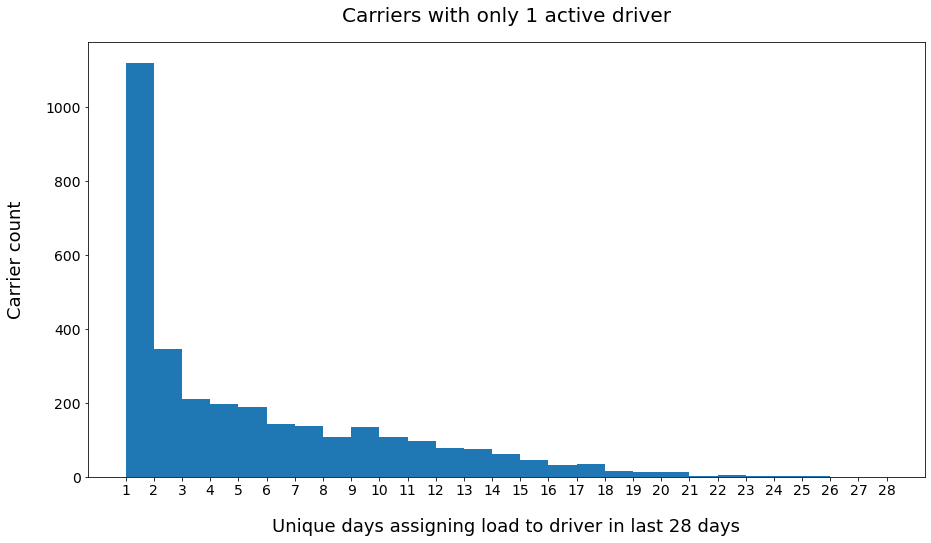

In [49]:
# histogram of unique days of carriers assigning loads to drivers
plt.figure(figsize=(15,8))
plt.hist(result_1[result_1['activated_drivers'] == 1]['assigned_load_out_of_28_days'], bins=np.arange(1, 29))
plt.xticks(np.arange(1, 29), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Unique days assigning load to driver in last 28 days', fontsize=18, labelpad=20)
plt.ylabel('Carrier count', fontsize=18, labelpad=20)
plt.title('Carriers with only 1 active driver', fontsize=20, pad=20)
plt.show()

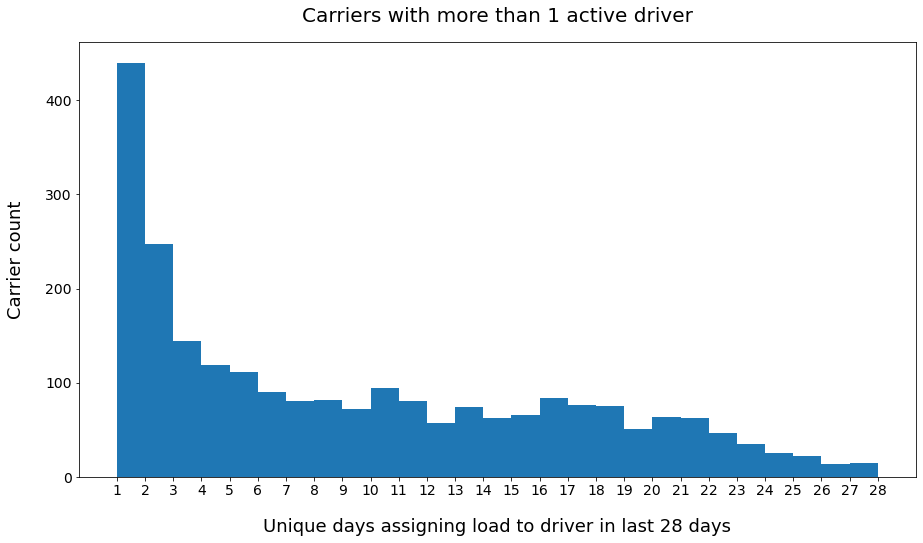

In [50]:
# histogram of unique days of carriers assigning loads to drivers
plt.figure(figsize=(15,8))
plt.hist(result_1[result_1['activated_drivers'] > 1]['assigned_load_out_of_28_days'], bins=np.arange(1, 29))
plt.xticks(np.arange(1, 29), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Unique days assigning load to driver in last 28 days', fontsize=18, labelpad=20)
plt.ylabel('Carrier count', fontsize=18, labelpad=20)
plt.title('Carriers with more than 1 active driver', fontsize=20, pad=20)
plt.show()